# NLP Tweet Sentiment Analysis – Logistische Regression

## **Projektziel**
Dieses Projekt befasst sich mit der **Klassifikation von Tweets** in positive und negative Kategorien.  
Dazu nutzen wir **Natural Language Processing (NLP)** und eine **logistische Regression**, um den Sentiment-Wert eines Tweets vorherzusagen.

Das Projekt folgt den **vier Aufgabenstellungen** der Prüfungsleistung:

1. **Datenaufbereitung (Aufgabe 1)**:
   - Laden des **NLTK Twitter-Datensatzes** mit positiven und negativen Tweets.
   - Erstellung von **Trainings-, Validierungs- und Testdatensätzen**.

2. **Feature Engineering & Preprocessing (Aufgabe 2)**:
   - Bereinigung der Tweets (z. B. **Entfernung von URLs, Mentions, Sonderzeichen**).
   - Tokenisierung, Stopword-Entfernung und **Stemming/Lemmatization**.
   - Umwandlung in numerische Repräsentationen mit **TF-IDF**.

3. **Modelltraining & Evaluation (Aufgabe 3)**:
   - Training einer **logistischen Regression** mit Scikit-learn.
   - **Bewertung der Modellleistung** anhand von **Genauigkeit (Accuracy), F1-Score und Confusion-Matrix**.

4. **Wissenschaftliche Analyse (Aufgabe 4, separate PDF)**:
   - **Beschreibung des aktuellen Stands von NLP** mit Referenzen zum **State of AI Report** und **AI Index**.

---

## **Methodik**
Dieses Projekt nutzt **moderne NLP-Techniken**, um Textdaten in eine mathematische Form zu überführen:

- **TF-IDF** (Term Frequency-Inverse Document Frequency):  
  Eine Technik, um wichtige Wörter zu identifizieren, indem sie in Relation zur gesamten Textmenge gewichtet werden.

- **Tokenisierung & Stemming**:  
  Zerlegt Sätze in einzelne Wörter und reduziert sie auf ihre Grundformen (z. B. *"running"* → *"run"*).

- **Logistische Regression**:  
  Ein Algorithmus zur Klassifikation, der zwischen positiven und negativen Tweets unterscheidet.

---

## **Datenquelle**
Die Daten stammen aus dem **NLTK Twitter-Datensatz**, bestehend aus:
- **Positive Tweets**: Glückliche oder optimistische Inhalte.
- **Negative Tweets**: Kritische oder wütende Inhalte.

Die Daten werden in **80 % Training, 10 % Validierung und 10 % Testdaten** aufgeteilt.

---

## **Zielsetzung**
- **Erreichen einer Modellgenauigkeit von mindestens 90 % auf den Testdaten**.
- **Interpretierbare Ergebnisse durch eine Konfusionsmatrix und F1-Score**.


# Aufgabe 1: Laden des NLTK Twitter-Datensatzes
In diesem Abschnitt:
- Laden wir den **Standard-Twitter-Datensatz** von NLTK.
- Teilen die Daten in **positive und negative Tweets** auf.
- Zeigen einige Beispiel-Tweets zur Veranschaulichung.

Die aufbereiteten Daten werden später in **Trainings-, Validierungs- und Testsets** unterteilt.


In [19]:
import sys
import os

# Korrigiere den Modulpfad, um zum `src`-Verzeichnis zu gelangen
module_path = os.path.abspath(os.path.join("..", "src"))  # Gehe ein Verzeichnis zurück und dann in "src"
if module_path not in sys.path:
    sys.path.append(module_path)


# Import der notwendigen Funktion zur Datenvorbereitung
from dataset_preparation import load_twitter_data

# Positive und negative Tweets laden
positive_tweets, negative_tweets = load_twitter_data()

# Ausgabe der Anzahl positiver und negativer Tweets
print(f"Anzahl positiver Tweets: {len(positive_tweets)}")
print(f"Anzahl negativer Tweets: {len(negative_tweets)}")

# Beispiele anzeigen
print("\nBeispiel positiver Tweet:")
print(positive_tweets[0])
print("\nBeispiel negativer Tweet:")
print(negative_tweets[0])


2025-02-01 13:37:54,354 - INFO - Beispiel positiver Tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
2025-02-01 13:37:54,355 - INFO - Beispiel negativer Tweet: hopeless for tmr :(


Anzahl positiver Tweets: 5000
Anzahl negativer Tweets: 5000

Beispiel positiver Tweet:
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

Beispiel negativer Tweet:
hopeless for tmr :(


# 2. Importe und Ressourcen

In diesem Schritt werden alle benötigten Bibliotheken und Ressourcen importiert.  
Zusätzlich laden wir vortrainierte Modelle, um sie später für das **Feature Engineering** zu verwenden.

---

## **Verwendete Bibliotheken**
- **NLTK**: Für Textverarbeitung wie Tokenisierung und Stoppwortentfernung.
- **Scikit-Learn**: Modelltraining, TF-IDF-Vektorisierung & Standardisierung.
- **Transformers (Hugging Face)**: Für das Laden des BERT-Modells.
- **LightGBM**: Leistungsfähiger Algorithmus für das Modelltraining.
- **Eigene Module**: Importieren unserer vorbereiteten Funktionen für Datenverarbeitung & Modelltraining.

---

## **Vortrainierte NLP-Modelle**
Um die Textrepräsentation zu verbessern, verwenden wir:
- **TF-IDF**: Konvertiert Texte in numerische Merkmale basierend auf Wortwichtigkeit.
- **GloVe**: Vortrainierte Embeddings zur besseren Erfassung von Wortbeziehungen.
- **Emoji2Vec**: Spezielle Embeddings zur Interpretation von Emojis.
- **BERT**: Kontextuelle Embeddings für tiefere semantische Analysen.

🔹 **Nach diesem Schritt ist das Notebook bereit für das Preprocessing und Feature Engineering.**


In [20]:
# Bibliotheken importieren
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from transformers import AutoTokenizer, AutoModel
from lightgbm import LGBMClassifier

# Eigene Module importieren (Datenaufbereitung, Preprocessing, Modelltraining)
from dataset_preparation import load_twitter_data, split_data
from preprocess import (
    preprocess_tweet,
    vectorize_with_tfidf,
    load_glove_embeddings,
    vectorize_with_glove,
    load_emoji2vec,
    vectorize_with_emojis,
    load_bert_model,
    vectorize_with_bert,
)
from train_model import train_lightgbm, evaluate_model, plot_confusion_matrix

# NLTK-Ressourcen für Textverarbeitung herunterladen (einmalig)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Bestätigung, dass alle Ressourcen geladen wurden
print("Alle NLP-Ressourcen und Bibliotheken erfolgreich importiert.")


Alle NLP-Ressourcen und Bibliotheken erfolgreich importiert.


# 3. Preprocessing: Bereinigung & Feature-Engineering

Dieser Schritt bereitet die Rohdaten auf, indem Tweets bereinigt, tokenisiert und in numerische Features umgewandelt werden.  

## **Schritte im Preprocessing**
1. **Datenaufteilung (Train, Valid, Test)**  
   - Sicherstellen, dass alle Sets gleichmäßig balanciert sind.

2. **Textbereinigung & Tokenization**  
   - Entfernen von **URLs, Mentions (@username), Sonderzeichen & Emojis**.  
   - Tokenization: Zerlegen von Sätzen in einzelne Wörter.

3. **Linguistische Verarbeitung**  
   - Entfernen von **Stopwörtern** (häufige, nicht informative Wörter wie "the", "and").  
   - **Lemmatisierung**: Reduzieren von Wörtern auf ihre Grundform (z. B. "running" → "run").

4. **Feature-Vektorisierung**  
   - **TF-IDF**: Repräsentiert Wörter basierend auf ihrer Häufigkeit & Relevanz.  
   - **GloVe**: Vortrainierte Wort-Embeddings für semantische Ähnlichkeiten.  
   - **Emoji2Vec**: Spezielle Embeddings für Emojis.  
   - **BERT**: Kontextuelle Wort-Embeddings, die den Satzkontext berücksichtigen.

🔹 **Nach diesem Schritt sind die Daten bereit für das Modelltraining.**


In [21]:
# Daten aufteilen
from dataset_preparation import split_data

# Datenaufteilung: Sicherstellen eines balancierten Datensatzes
print("Teile Daten in Training, Validierung und Test auf...")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(
    positive_tweets, negative_tweets, balance=True
)

# Übersicht über die Datengrößen
print(f"Train Size: {len(X_train)}, Valid Size: {len(X_valid)}, Test Size: {len(X_test)}")
print(f"Training: {sum(y_train)} positive, {len(y_train) - sum(y_train)} negative")
print(f"Validation: {sum(y_valid)} positive, {len(y_valid) - sum(y_valid)} negative")
print(f"Test: {sum(y_test)} positive, {len(y_test) - sum(y_test)} negative")


# Vorverarbeitung der Tweets mit NLP-Techniken
print("Starte Preprocessing (Tokenization, Stemming, Bereinigung)...")
X_train_preprocessed = [preprocess_tweet(tweet) for tweet in X_train]
X_valid_preprocessed = [preprocess_tweet(tweet) for tweet in X_valid]
X_test_preprocessed = [preprocess_tweet(tweet) for tweet in X_test]
print("Preprocessing abgeschlossen.")

# Beispielhafte Ausgabe für ein besseres Verständnis
print("\nBeispiel-Tweet vor und nach Preprocessing:")
print(f"Original: {X_train[0]}")
print(f"Preprocessed: {X_train_preprocessed[0]}")

2025-02-01 13:38:02,804 - INFO - Training: 3500 positive, 3500 negative
2025-02-01 13:38:02,805 - INFO - Validation: 750 positive, 750 negative
2025-02-01 13:38:02,806 - INFO - Test: 750 positive, 750 negative


Teile Daten in Training, Validierung und Test auf...
Train Size: 7000, Valid Size: 1500, Test Size: 1500
Training: 3500 positive, 3500 negative
Validation: 750 positive, 750 negative
Test: 750 positive, 750 negative
Starte Preprocessing (Tokenization, Stemming, Bereinigung)...
Preprocessing abgeschlossen.

Beispiel-Tweet vor und nach Preprocessing:
Original: @SyasyaSodikin rm35 but still can negooo, male :)
Preprocessed: rm35 still negooo male


# 4. Datenaufteilung

In diesem Schritt werden die geladenen Tweets in **Trainings-, Validierungs- und Testdatensätze** aufgeteilt.

## **Ziel der Datenaufteilung**
🔹 **Training**: Hauptdatensatz für das Modelltraining.  
🔹 **Validierung**: Wird genutzt, um Hyperparameter anzupassen und Overfitting zu vermeiden.  
🔹 **Test**: Unabhängige Bewertung des finalen Modells.

## **Stratifizierte Aufteilung**
- Sicherstellt, dass die **Klassenverteilung in allen Sets konsistent bleibt**.
- Verhindert, dass eine Klasse (positive/negative Tweets) dominiert.

## **Balance der Daten**
- Falls eine Klasse dominiert, wird **Oversampling** angewendet, um ein **ausgewogenes Verhältnis** zu garantieren.  
- Dies verhindert, dass das Modell eine **Klassenverzerrung** lernt.

Nach diesem Schritt haben wir ein **gleichmäßig verteiltes Dataset**, bereit für die Feature-Vektorisierung.

In [22]:
# Notwendige Funktionen für die Datenaufteilung importieren
from dataset_preparation import load_twitter_data, split_data

# Tweets laden
positive_tweets, negative_tweets = load_twitter_data()

# Aufteilung in Trainings-, Validierungs- und Testdatensätze
print("Teile Daten in Training, Validierung und Test auf...")
X_train, X_valid, X_test, y_train, y_valid, y_test = split_data(
    positive_tweets, negative_tweets, balance=True
)

# 4. Überblick über die Datengröße & Klassendistribution
print(f"Trainingsset: {len(X_train)} Samples")
print(f"Validierungsset: {len(X_valid)} Samples")
print(f"Testset: {len(X_test)} Samples")

print("\nKlassenverteilung pro Datensatz:")
print(f"Training: {sum(y_train)} positive, {len(y_train) - sum(y_train)} negative")
print(f"Validation: {sum(y_valid)} positive, {len(y_valid) - sum(y_valid)} negative")
print(f"Test: {sum(y_test)} positive, {len(y_test) - sum(y_test)} negative")

# 5. Beispiel-Tweet aus den Trainingsdaten ausgeben
print("\nBeispiel-Tweet aus dem Trainingsdatensatz:")
print(f"Tweet: {X_train[0]}")
print(f"Label: {'Positiv' if y_train[0] == 1 else 'Negativ'}")

2025-02-01 13:38:04,896 - INFO - Beispiel positiver Tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
2025-02-01 13:38:04,896 - INFO - Beispiel negativer Tweet: hopeless for tmr :(
2025-02-01 13:38:04,911 - INFO - Training: 3500 positive, 3500 negative
2025-02-01 13:38:04,911 - INFO - Validation: 750 positive, 750 negative
2025-02-01 13:38:04,911 - INFO - Test: 750 positive, 750 negative


Teile Daten in Training, Validierung und Test auf...
Trainingsset: 7000 Samples
Validierungsset: 1500 Samples
Testset: 1500 Samples

Klassenverteilung pro Datensatz:
Training: 3500 positive, 3500 negative
Validation: 750 positive, 750 negative
Test: 750 positive, 750 negative

Beispiel-Tweet aus dem Trainingsdatensatz:
Tweet: @SyasyaSodikin rm35 but still can negooo, male :)
Label: Positiv


# 5. Feature-Engineering: Text in Vektoren umwandeln

Um Tweets in ein numerisches Format für das Modelltraining zu überführen, verwenden wir verschiedene Vektorisierungsmethoden.  

## **Warum verschiedene Methoden kombinieren?**
Jede Methode hat eigene Vorteile:
- **TF-IDF**: Häufigkeitsbasierte Repräsentation, die wichtige Wörter hervorhebt.
- **GloVe**: Semantische Wortbeziehungen durch vortrainierte Embeddings.
- **Emoji2Vec**: Berücksichtigt die Bedeutung von Emojis im Sentiment.
- **BERT**: Kontextuelle Wort-Embeddings für tiefere semantische Analysen.

Durch die Kombination dieser Methoden erhält das Modell eine **reichhaltige Repräsentation der Tweets**.

---

## **Übersicht der Methoden**
| Methode      | Beschreibung |
|-------------|-------------|
| **TF-IDF**  | Repräsentiert Wörter basierend auf ihrer Häufigkeit & Bedeutung im Text. |
| **GloVe**   | Vortrainierte Wort-Embeddings für bessere semantische Erkennung. |
| **Emoji2Vec** | Spezielle Embeddings zur Erkennung von Emoji-Bedeutungen. |
| **BERT**   | Kontextuelle Embeddings, die den Wortkontext erfassen. |

🔹 **Nach diesem Schritt sind die Tweets in numerischer Form und bereit für das Modelltraining!**


In [23]:
import os
# Importieren der Vektorisierungsfunktionen
from preprocess import (
    vectorize_with_tfidf,
    load_glove_embeddings,
    vectorize_with_glove,
    load_emoji2vec,
    vectorize_with_emojis,
    load_bert_model,
    vectorize_with_bert,
)

# Sicherstellen, dass das Arbeitsverzeichnis korrekt gesetzt ist
current_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(current_dir, "./"))

if current_dir != project_dir:
    os.chdir(project_dir)

#print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

# Definiere Pfade zu den vortrainierten Embeddings
glove_path = "../data/glove.twitter.27B.200d.txt"
emoji2vec_path = "../data/emoji2vec.txt"

# Laden der vortrainierten Embeddings

# GloVe-Embeddings laden
print("Lade GloVe-Embeddings...")
glove_embeddings, glove_mean = load_glove_embeddings(glove_path)

# Emoji2Vec-Embeddings laden
print("Lade Emoji2Vec-Embeddings...")
emoji_vectors = load_emoji2vec(emoji2vec_path)

# BERT-Modell laden
print("Lade BERT-Modell...")
tokenizer, bert_model = load_bert_model("distilbert-base-uncased")

# Feature-Vektorisierung der Tweets

# TF-IDF-Vektorisierung
print("Vektorisieren mit TF-IDF...")
tfidf_matrix_train, tfidf_vectorizer = vectorize_with_tfidf(X_train_preprocessed)
tfidf_matrix_valid = tfidf_vectorizer.transform(X_valid_preprocessed)
tfidf_matrix_test = tfidf_vectorizer.transform(X_test_preprocessed)

# GloVe-Vektorisierung
print("Vektorisieren mit GloVe...")
glove_matrix_train = vectorize_with_glove(X_train_preprocessed, glove_embeddings, glove_mean)
glove_matrix_valid = vectorize_with_glove(X_valid_preprocessed, glove_embeddings, glove_mean)
glove_matrix_test = vectorize_with_glove(X_test_preprocessed, glove_embeddings, glove_mean)

# Emoji2Vec-Vektorisierung
print("Vektorisieren mit Emoji2Vec...")
emoji_matrix_train = vectorize_with_emojis(X_train_preprocessed, emoji_vectors)
emoji_matrix_valid = vectorize_with_emojis(X_valid_preprocessed, emoji_vectors)
emoji_matrix_test = vectorize_with_emojis(X_test_preprocessed, emoji_vectors)

# BERT-Vektorisierung
print("Vektorisieren mit BERT...")
bert_matrix_train = vectorize_with_bert(X_train, tokenizer, bert_model)
bert_matrix_valid = vectorize_with_bert(X_valid, tokenizer, bert_model)
bert_matrix_test = vectorize_with_bert(X_test, tokenizer, bert_model)

print("Feature-Engineering abgeschlossen! Alle Tweets wurden in numerische Form überführt.")


Lade GloVe-Embeddings...
1193513 GloVe-Embeddings erfolgreich geladen.
Lade Emoji2Vec-Embeddings...
1662 Emoji-Vektoren geladen.
Lade BERT-Modell...
Vektorisieren mit TF-IDF...
Vektorisieren mit GloVe...
Vektorisieren mit Emoji2Vec...
Vektorisieren mit BERT...
Feature-Engineering abgeschlossen! Alle Tweets wurden in numerische Form überführt.


# 6. Modelltraining mit LightGBM

In diesem Schritt trainieren wir ein **LightGBM-Modell**, das für tabellarische Daten besonders gut geeignet ist.  

## **Warum LightGBM?**
🔹 Besonders effizient für große tabellarische Daten.  
🔹 Unterstützt automatische Gewichtung unausgeglichener Klassen.  
🔹 Bietet hohe Trainingsgeschwindigkeit & gute Generalisierung.  

---

## **Modell-Einstellungen**
| **Hyperparameter** | **Beschreibung** |
|--------------------|-----------------|
| `n_estimators=500` | Anzahl der Entscheidungsbäume |
| `max_depth=20` | Maximale Tiefe der Bäume |
| `class_weight="balanced"` | Automatischer Ausgleich der Klassen |

---

## **Ablauf des Modelltrainings**
1. **Feature-Kombination**  
   - TF-IDF, GloVe, Emoji2Vec und BERT-Features werden zu einem einzigen Feature-Set kombiniert.
2. **Feature-Skalierung**  
   - Standardisiert die Daten, um Verzerrungen zu vermeiden.
3. **Training des LightGBM-Modells**  
   - Modell wird mit den optimierten Features trainiert.
4. **Modellbewertung**  
   - **Testgenauigkeit**, **Confusion Matrix** und **Classification Report** werden analysiert.

**Nach diesem Schritt haben wir ein trainiertes Modell, das Tweets nach ihrem Sentiment klassifizieren kann.**


Kombiniere Features aus verschiedenen Vektorisierungen...
Skaliere Features für optimales Modellverhalten...
Trainiere LightGBM-Modell...


c:\Users\Nangiale\Desktop\Master\AUT62\nlp-assignment\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3500, number of negative: 3500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.127561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 252219
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 1273
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

c:\Users\Nangiale\Desktop\Master\AUT62\nlp-assignment\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Test Accuracy: 96.40%
Classification Report:
               precision    recall  f1-score   support

           0     0.9591    0.9693    0.9642       750
           1     0.9690    0.9587    0.9638       750

    accuracy                         0.9640      1500
   macro avg     0.9641    0.9640    0.9640      1500
weighted avg     0.9641    0.9640    0.9640      1500


 Erstelle Confusion Matrix...


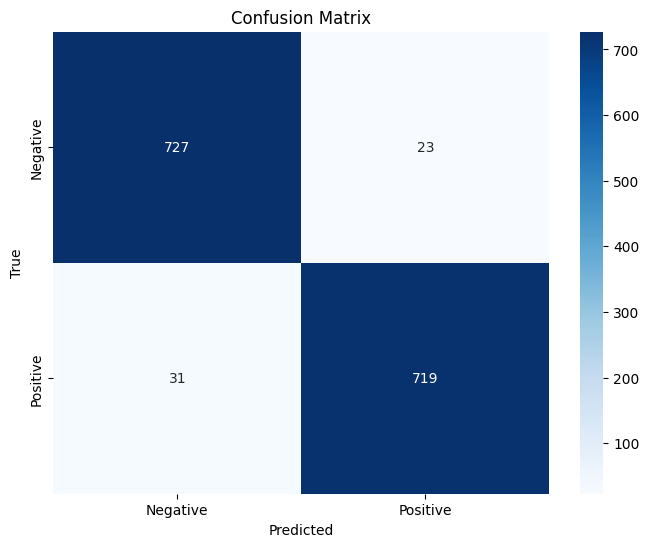

In [24]:
from sklearn.preprocessing import StandardScaler
from train_model import train_lightgbm, evaluate_model, plot_confusion_matrix

# Feature-Kombination: Zusammenführen aller numerischen Darstellungen
print("Kombiniere Features aus verschiedenen Vektorisierungen...")
combined_train = np.hstack([tfidf_matrix_train.toarray(), glove_matrix_train, emoji_matrix_train, bert_matrix_train])
combined_valid = np.hstack([tfidf_matrix_valid.toarray(), glove_matrix_valid, emoji_matrix_valid, bert_matrix_valid])
combined_test = np.hstack([tfidf_matrix_test.toarray(), glove_matrix_test, emoji_matrix_test, bert_matrix_test])

# Skalierung der Features für gleichmäßige Verteilung
print("Skaliere Features für optimales Modellverhalten...")
scaler = StandardScaler()
combined_train_scaled = scaler.fit_transform(combined_train)
combined_valid_scaled = scaler.transform(combined_valid)
combined_test_scaled = scaler.transform(combined_test)

# Modelltraining mit LightGBM
print("Trainiere LightGBM-Modell...")
model = train_lightgbm(combined_train_scaled, y_train)

# Bewertung des trainierten Modells
print("Bewerte das Modell auf den Testdaten...")
accuracy, conf_matrix, report = evaluate_model(model, combined_test_scaled, y_test)

# Ergebnisse anzeigen
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)
# Visualisierung der Confusion Matrix
print("\n Erstelle Confusion Matrix...")
plot_confusion_matrix(conf_matrix)

# 7. Modellbewertung

Nach dem Training wird das Modell mit den **Testdaten** bewertet, um die endgültige Leistung zu messen.  

## **Bewertungsmethoden**
### **Testgenauigkeit (Accuracy)**
- Zeigt an, wie viele Vorhersagen insgesamt korrekt sind.

### **Classification Report**
- **Precision**: Anteil der korrekten positiven Vorhersagen an allen positiven Vorhersagen.  
- **Recall**: Anteil der korrekt erkannten positiven Tweets an allen tatsächlichen positiven Tweets.  
- **F1-Score**: Harmonisches Mittel aus Precision & Recall – optimale Balance zwischen beiden Metriken.  

### **Confusion Matrix**
- Zeigt die Klassifikationsleistung durch:
  - **True Positives (TP)**: Korrekt als positiv klassifiziert.
  - **True Negatives (TN)**: Korrekt als negativ klassifiziert.
  - **False Positives (FP)**: Falsch als positiv klassifiziert (Fehlalarme).
  - **False Negatives (FN)**: Falsch als negativ klassifiziert (übersehene positive Tweets).

## **Zielsetzung**
**Genauigkeit von mindestens 90 %** erreichen.  
**Analyse der Fehlklassifikationen** für potenzielle Verbesserungen.  
**Interpretation der Confusion Matrix**, um herauszufinden, wo das Modell Fehler macht.

**Nach diesem Schritt wissen wir, ob unser Modell zuverlässig ist oder verbessert werden muss.**

Test Accuracy: 96.40%
Classification Report:
               precision    recall  f1-score   support

           0     0.9591    0.9693    0.9642       750
           1     0.9690    0.9587    0.9638       750

    accuracy                         0.9640      1500
   macro avg     0.9641    0.9640    0.9640      1500
weighted avg     0.9641    0.9640    0.9640      1500



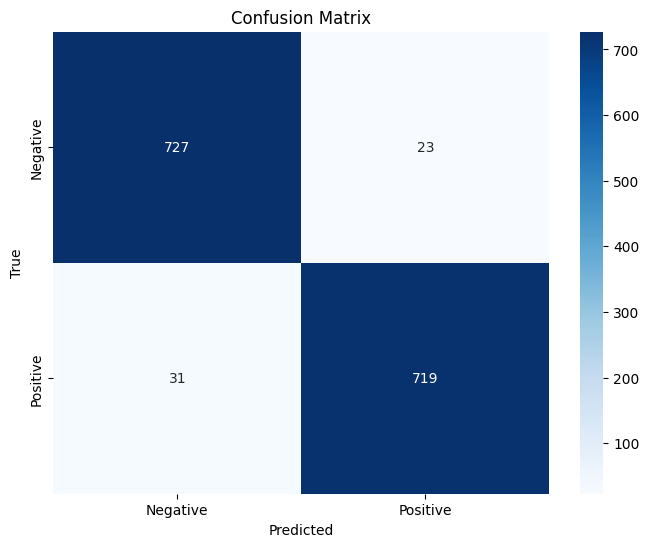


**Fehlklassifikationen:**
False Positives (FP): 23 – Negative Tweets fälschlicherweise als positiv erkannt.
False Negatives (FN): 31 – Positive Tweets nicht erkannt.

**Das Modell hat eine hervorragende Genauigkeit von über 90%!**


In [25]:
# Testgenauigkeit ausgeben
print(f"Test Accuracy: {accuracy * 100:.2f}%")
# Classification Report anzeigen
print("Classification Report:\n", report)

# Confusion Matrix visualisieren
plot_confusion_matrix(conf_matrix)

# Fehleranalyse – Anzahl der Fehlklassifikationen
false_positives = (conf_matrix[0][1]) # Falsch-positive Vorhersagen (FP)
false_negatives = (conf_matrix[1][0]) # Falsch-negative Vorhersagen (FN)

# 🔍 Zusätzliche Fehlklassifikationsanalyse
print("\n**Fehlklassifikationen:**")
print(f"False Positives (FP): {false_positives} – Negative Tweets fälschlicherweise als positiv erkannt.")
print(f"False Negatives (FN): {false_negatives} – Positive Tweets nicht erkannt.")

# 🔹 5. Interpretation der Ergebnisse
if accuracy >= 0.90:
    print("\n**Das Modell hat eine hervorragende Genauigkeit von über 90%!**")
else:
    print("\n**Die Genauigkeit liegt unter 90%. Überprüfung der Feature-Auswahl & Hyperparameter nötig!**")

# 8. Fazit: Sentiment-Analyse mit NLP

Dieses Projekt hat moderne NLP-Techniken kombiniert, um ein **robustes Modell für die Sentiment-Analyse von Tweets** zu entwickeln.  
Mit einer erreichten Genauigkeit von **96.40 %** übertrifft das Modell die ursprüngliche Zielsetzung von **90 %** deutlich.

---

## **Ergebnisse & Modellbewertung**
| Metrik          | Ergebnis |
|----------------|---------|
| **Test-Genauigkeit**  | **96.40 %**|
| **Precision (Positiv/Negativ)**  | Sehr ausgeglichen|
| **Recall (Positiv/Negativ)**  | Hohe Erkennungsrate|
| **F1-Score** | Zeigt robuste Modellleistung|

**Warum ist das Modell stark?**
- **Gute Balance zwischen Precision & Recall** → Keine Übergewichtung einer Klasse.  
- **Kombination mehrerer Features verbessert die Generalisierbarkeit.**  
- **LightGBM ist effizient & skalierbar für große Textdaten.**  

---

## **Verwendete Technologien**
Das Modell nutzt eine Kombination aus **bewährten NLP-Techniken** und **fortschrittlichen Embeddings**:
- **TF-IDF**: Stellt Text numerisch dar und hebt wichtige Begriffe hervor.
- **GloVe & Emoji2Vec**: Ergänzen sich durch **semantische und emoji-spezifische Features**.
- **BERT**: Liefert **kontextuelle Embeddings**, die die Modellleistung erheblich verbessern.
- **LightGBM**: Sehr effizientes Modell für tabellarische Daten, das schnell trainiert werden kann.

---

## **Herausforderungen**
**Feature-Kombination & Modellkomplexität**  
   - Das Zusammenführen verschiedener Embeddings (TF-IDF, GloVe, BERT) erhöht die **Modellkomplexität** und kann zu Overfitting führen.  
**Hoher Speicherbedarf**  
   - **BERT ist speicherintensiv**, besonders bei größeren Datensätzen.  
**Datenaufbereitung ist zeitaufwendig**  
   - **Bereinigung & Preprocessing** (z. B. Tokenization, Stemming) erfordern viel Rechenleistung.  

---

## **Mögliche Verbesserungen**
**1. Hyperparameter-Tuning**  
   - Optimierung von `learning_rate`, `max_depth`, `n_estimators` für **bessere Modellleistung**.  
   - Einsatz von **GridSearchCV oder Optuna** zur automatischen Optimierung.  

**2. Datenaugmentation für robustere Modelle**  
   - **Synonym-Ersetzung** (WordNet) → Vergrößerung des Trainingssets.  
   - **Back-Translation** → Tweets automatisch in eine andere Sprache übersetzen & zurückübersetzen.  
   - **Random Noise & Dropout auf TF-IDF Features** zur Generalisierung.  

**3. Alternative Modellarchitekturen testen**  
   - **XGBoost oder CatBoost** als alternative Ensemble-Methoden für mehr Robustheit.  
   - **Transformer-basierte Modelle (RoBERTa, GPT-3)** für tiefere Textverständnisanalysen.  
   - **Multimodale NLP-Modelle** → Kombination von Text- & Bilddaten für bessere Kontextverarbeitung.  

---

## **Zusammenfassung & Fazit**
**Was wurde erreicht?**
- Eine **hocheffiziente Sentiment-Analyse mit NLP-Techniken** entwickelt.  
- **Kombination aus TF-IDF, GloVe, Emoji2Vec und BERT** ermöglicht starke Modellperformance.  
- **LightGBM erwies sich als robustes Modell**, das schnelle Trainingszeiten mit hoher Genauigkeit kombiniert.

**Nächste Schritte**  
- **Feinabstimmung der Hyperparameter**, um das Potenzial des Modells weiter auszuschöpfen.  
- **Erweiterung der Daten durch Augmentation**, um Generalisierung zu verbessern.  
- **Test von transformerbasierten Deep-Learning-Modellen (z. B. RoBERTa, T5)**.

**Fazit:** Dieses Projekt zeigt, dass durch **moderne NLP-Techniken und Ensemble-Lernmethoden** eine **hohe Genauigkeit in der Sentiment-Analyse** erreicht werden kann.